# **Log Data Processing**

### **Load Packages**

In [1]:
# Import other necessary packages for data configuration and plotting
import matplotlib.pyplot as plt

from pyCoreRelator.log.ml_log_data_imputation import (
    preprocess_core_data,
    plot_core_logs,
    process_and_fill_logs
)

<hr>

### **Define data structure**

#### Define core name and core length

In [ ]:
# core_name = "M9907-11PC"  # Core name
# total_length_cm = 439     # Core length in cm

# core_name = "M9907-12PC"  # Core name
# total_length_cm = 488     # Core length in cm

# core_name = "M9907-14TC"  # Core name
# total_length_cm = 199     # Core length in cm

# core_name = "M9907-22PC"  # Core name
# total_length_cm = 501     # Core length in cm

# core_name = "M9907-22TC"  # Core name
# total_length_cm = 173     # Core length in cm

core_name = "M9907-23PC"  # Core name
total_length_cm = 783     # Core length in cm

# core_name = "M9907-25PC"  # Core name
# total_length_cm = 797     # Core length in cm

# core_name = "RR0207-56PC"  # Core name
# total_length_cm = 794     # Core length in cm

# core_name = "M9907-30PC"  # Core name
# total_length_cm = 781     # Core length in cm

# core_name = "M9907-31PC"  # Core name
# total_length_cm = 767     # Core length in cm

#### Define file path, data configuration, and outliner cut-off thresholds for ML data processing

In [3]:
# First get subfolder paths that were previously calculated outside the function
# Determine MST and HRMS subfolder paths based on core name
if core_name.startswith('M99'):
    mst_subfolder = "OSU orignal dataset/R-V_Melville99/Calibrated_MST/"
    hrms_subfolder = "OSU orignal dataset/R-V_Melville99/M9907_point_mag/"
elif core_name.startswith('RR02'):
    mst_subfolder = "OSU orignal dataset/R-V_Revelle02/Calibrated_MST/"
    hrms_subfolder = "OSU orignal dataset/R-V_Revelle02/RR0207_point_mag/"
else:
    mst_subfolder = "OSU orignal dataset/R-V_Melville99/Calibrated_MST/"
    hrms_subfolder = "OSU orignal dataset/R-V_Melville99/M9907_point_mag/"

# Data configuration for ML data imputation
# This replaces all hardcoded column names and parameters in the functions
data_config = {
    # Core information
    'mother_dir': '/Users/larryslai/Library/CloudStorage/Dropbox/My Documents/University of Texas Austin/(Project) NWP turbidites/Cascadia_core_data/OSU_dataset/',
    'core_name': core_name,
    'core_length': total_length_cm,
    'data_folder': f'_compiled_logs/{core_name}/',
    'clean_output_folder': f'_compiled_logs/{core_name}/ML_clean/',
    'filled_output_folder': f'_compiled_logs/{core_name}/ML_filled/',
    
    # Input file paths for raw data
    'input_file_paths': {
        'ct': f'_compiled_logs/{core_name}/{core_name}_CT.csv',
        'rgb': f'_compiled_logs/{core_name}/{core_name}_RGB.csv',
        'hrms': f'{hrms_subfolder}{core_name}_point_mag.csv',
        'mst': f'{mst_subfolder}{core_name}_MST.csv'
    },
    
    # File paths for cleaned data
    'clean_file_paths': {
        'ct': f'{core_name}_CT_clean.csv',
        'rgb': f'{core_name}_RGB_clean.csv',
        'hrms': f'{core_name}_hiresMS_clean.csv',
        'mst': f'{core_name}_MST_clean.csv'
    },
    
    'filled_file_paths': {
        'ct': f'{core_name}_CT_MLfilled.csv',
        'rgb': f'{core_name}_RGB_MLfilled.csv',
        'hrms': f'{core_name}_hiresMS_MLfilled.csv',
        'mst': f'{core_name}_MST_MLfilled.csv'
    },
    
    # Primary depth column name
    'depth_column': 'SB_DEPTH_cm',
    
    # Column configs with all information consolidated including plotting controls
    'column_configs': {
        'ct': {
            'data_col': 'CT', 
            'std_col': 'CT_std', 
            'depth_col': 'SB_DEPTH_cm',
            'plot_label': 'CT\nBrightness',
            'plot_colors': ['black'],
            'show_colormap': True,
            'colormap': 'jet',
            'image_path': f'_compiled_logs/{core_name}/{core_name}_CT.tiff'
        },
        'rgb': {
            'data_cols': ['R', 'G', 'B', 'Lumin'],
            'std_cols': ['R_std', 'G_std', 'B_std', 'Lumin_std'],
            'depth_col': 'SB_DEPTH_cm',
            'feature_weights': [0.3, 0.3, 0.3, 0.3],                           # corresponds to ['R', 'G', 'B', 'Lumin']
            'rgb_threshold': [35, 220, 2],                                     # [min_val, max_val, buffer_size] for extreme RGB values
            'group_in_subplot': True,                                          # Plot all RGB channels together
            'plot_label': 'RGB\nChannels',
            'plot_colors': ['red', 'green', 'blue', 'black'],                  # Colors for R, G, B, Lumin curves
            'colormap_cols': ['Lumin'],                                        # Which columns should show colormap visualization
            'colormap': 'inferno',                                             # Colormap for Lumin
            'image_path': f'_compiled_logs/{core_name}/{core_name}_RGB.tiff',
            'additional_feature_source': 'mst',                                # Source data type for additional features
            'additional_feature_columns': ['Den_gm/cc']                        # Specific columns to use as additional features
        },
        'hrms': {
            'data_col': 'hiresMS', 
            'depth_col': 'SB_DEPTH_cm',
            'plot_label': 'High-Res\nMagnetic\nSusceptibility\n(μSI)',
            'plot_color': 'darkgreen',
            'feature_weight': 3.0,
            'threshold': ['<=', 19, 1]
        },
        'mst': {
            'ms': {
                'data_col': 'MS', 
                'depth_col': 'SB_DEPTH_cm',
                'plot_label': 'Low-Res\nMagnetic\nSusceptibility\n(μSI)',
                'plot_color': 'lightgreen',
                'feature_weight': 0.05,
                'threshold': ['>', 146, 1]
            },
            'density': {
                'data_col': 'Den_gm/cc', 
                'depth_col': 'SB_DEPTH_cm',
                'plot_label': 'Density\n(g/cc)',
                'plot_color': 'orange',
                'feature_weight': 0.5,
                'threshold': ['<', 1.14, 1]
            },
            'pwvel': {
                'data_col': 'PWVel_m/s', 
                'depth_col': 'SB_DEPTH_cm',
                'plot_label': 'P-wave\nVelocity\n(m/s)',
                'plot_color': 'purple',
                'feature_weight': 0.01,
                'threshold': ['>=', 1076, 1]
            },
            'pwamp': {
                'data_col': 'PWAmp', 
                'depth_col': 'SB_DEPTH_cm',
                'plot_label': 'P-wave\nAmplitude',
                'plot_color': 'purple',
                'feature_weight': 0.01,
                'threshold': ['>=', 30, 1]
            },
            'elecres': {
                'data_col': 'ElecRes_ohmm', 
                'depth_col': 'SB_DEPTH_cm',
                'plot_label': 'Electrical\nResistivity\n(ohm-m)',
                'plot_color': 'brown',
                'threshold': ['<', 0, 1]
            }
        }
    }
}

### Data cleaning

Starting data cleaning...
Processing rgb data...
Saved cleaned rgb data to: /Users/larryslai/Library/CloudStorage/Dropbox/My Documents/University of Texas Austin/(Project) NWP turbidites/Cascadia_core_data/OSU_dataset/_compiled_logs/M9907-11PC/ML_clean/M9907-11PC_RGB_clean.csv
Processing mst data...
Saved cleaned mst data to: /Users/larryslai/Library/CloudStorage/Dropbox/My Documents/University of Texas Austin/(Project) NWP turbidites/Cascadia_core_data/OSU_dataset/_compiled_logs/M9907-11PC/ML_clean/M9907-11PC_MST_clean.csv
Raw file not found for hrms: /Users/larryslai/Library/CloudStorage/Dropbox/My Documents/University of Texas Austin/(Project) NWP turbidites/Cascadia_core_data/OSU_dataset/OSU orignal dataset/R-V_Melville99/M9907_point_mag/M9907-11PC_point_mag.csv
Processing ct data...
Saved cleaned ct data to: /Users/larryslai/Library/CloudStorage/Dropbox/My Documents/University of Texas Austin/(Project) NWP turbidites/Cascadia_core_data/OSU_dataset/_compiled_logs/M9907-11PC/ML_clea

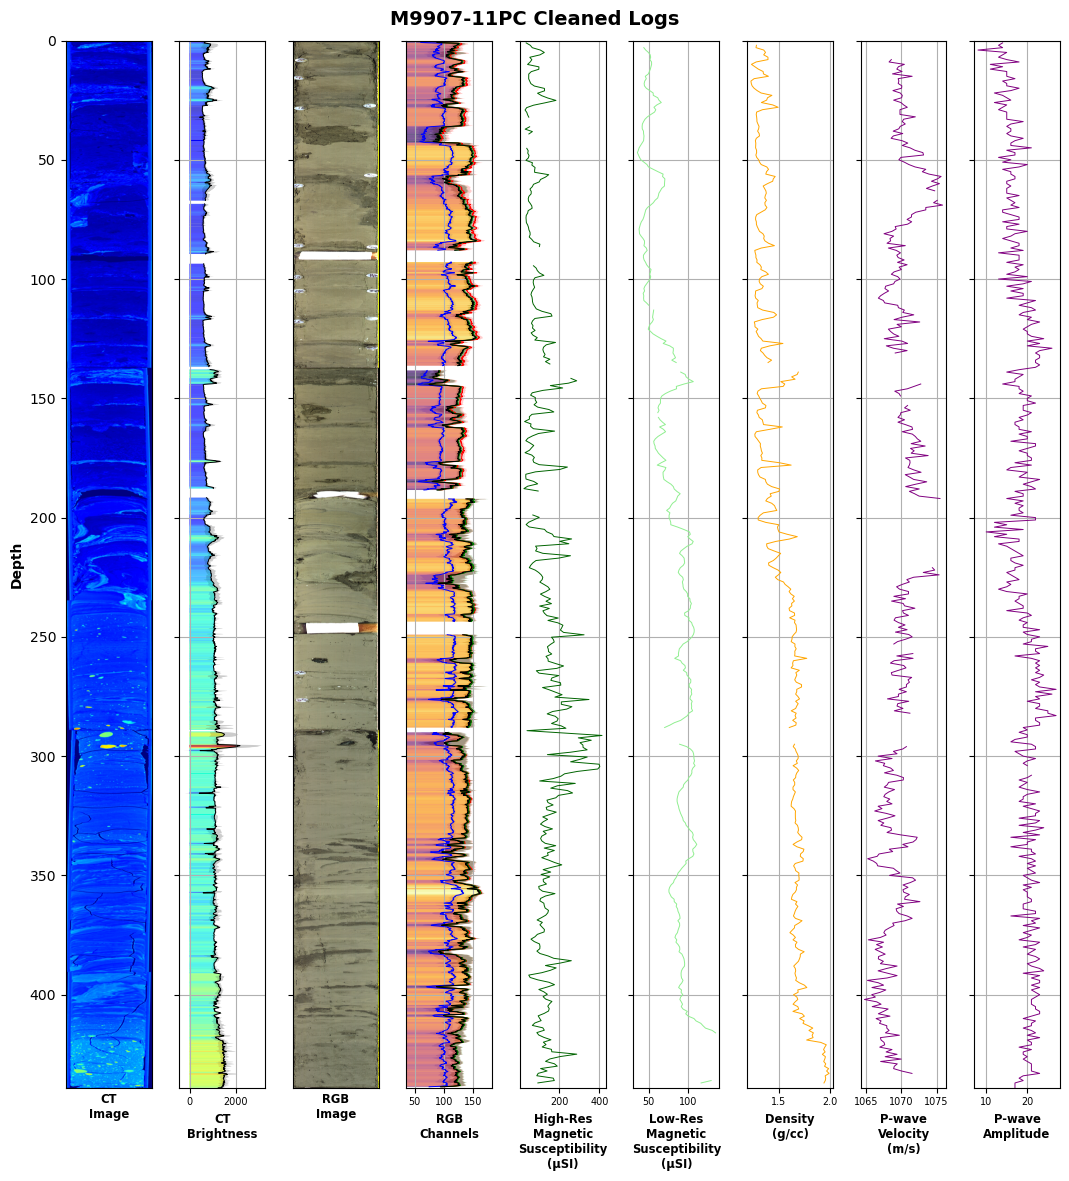

In [4]:
# Run data cleaning function - now completely driven by data_config
print("Starting data cleaning...")
preprocess_core_data(data_config)

# Plot processed logs using new function signature
fig, axes = plot_core_logs(
    data_config,                           # Data configuration containing all parameters
    file_type='clean',                     # Type of data files to plot ('clean' or 'filled')
    title=f'{core_name} Cleaned Logs'      # Title for the plot figure
)
plt.show()

### ML-based data gap filling

In [5]:
# process_and_fill_logs(data_config,              # Data configuration containing all parameters
#                       ml_method='xgblgbm')      # Available ml_method options: 'rf', 'rftc', 'xgb', 'xgblgbm'
#                                                 # - 'rf': Random Forest ML
#                                                 # - 'rftc': Random Forest ML with trend constraints
#                                                 # - 'xgb': XGBoost ML
#                                                 # - 'xgblgbm': XGBoost + LightGBM ML         

#### Plot ML-based gap-filled log diagram

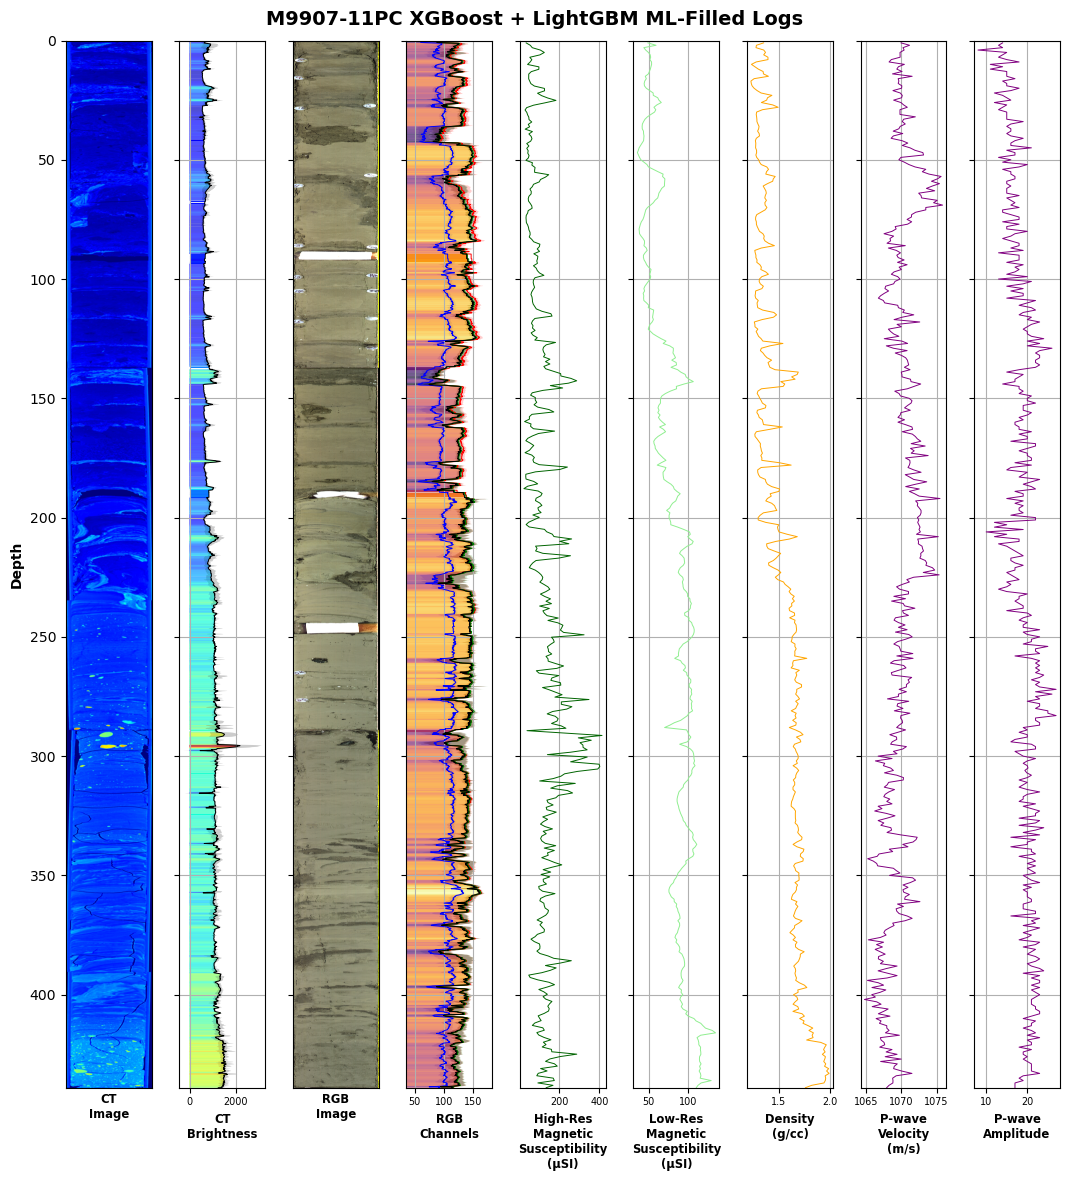

In [6]:
# Plot ML-based gap-filled log diagram
fig, axes = plot_core_logs(
    data_config,                                              # Data configuration containing all parameters
    file_type='filled',                                       # Type of data files to plot ('filled' for gap-filled data)
    title=f'{core_name} XGBoost + LightGBM ML-Filled Logs'    # Title for the plot figure
)
plt.show()